In [1]:
%load_ext autoreload
#To update the imported files

In [65]:
%autoreload
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '../')
from constants import *
from utilities_xgb import *
from utilities import *

In [62]:
hyperparameters = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}

# Dataset A

In [261]:
selected_features_a = selected_features.copy()
#selected_features_a.remove("direct_rad:W")
hyperparameters_a = hyperparameters
wanted_months_a = [3,4,5,7,8,9,10]
wanted_months_est = [3,4,5,6,7,8,9,10]

In [262]:
X_train_a_prep = prepare_X(X_observed_a.copy(), X_estimated_a.copy(), selected_features_a, wanted_months_a, wanted_months_est)
X_train_a, y_train_a = resize_training_data(X_train_a_prep, y_a)
X_test_a_prep = prepare_testdata_rf_a(X_test_a, selected_features_a)

358.56027904171754


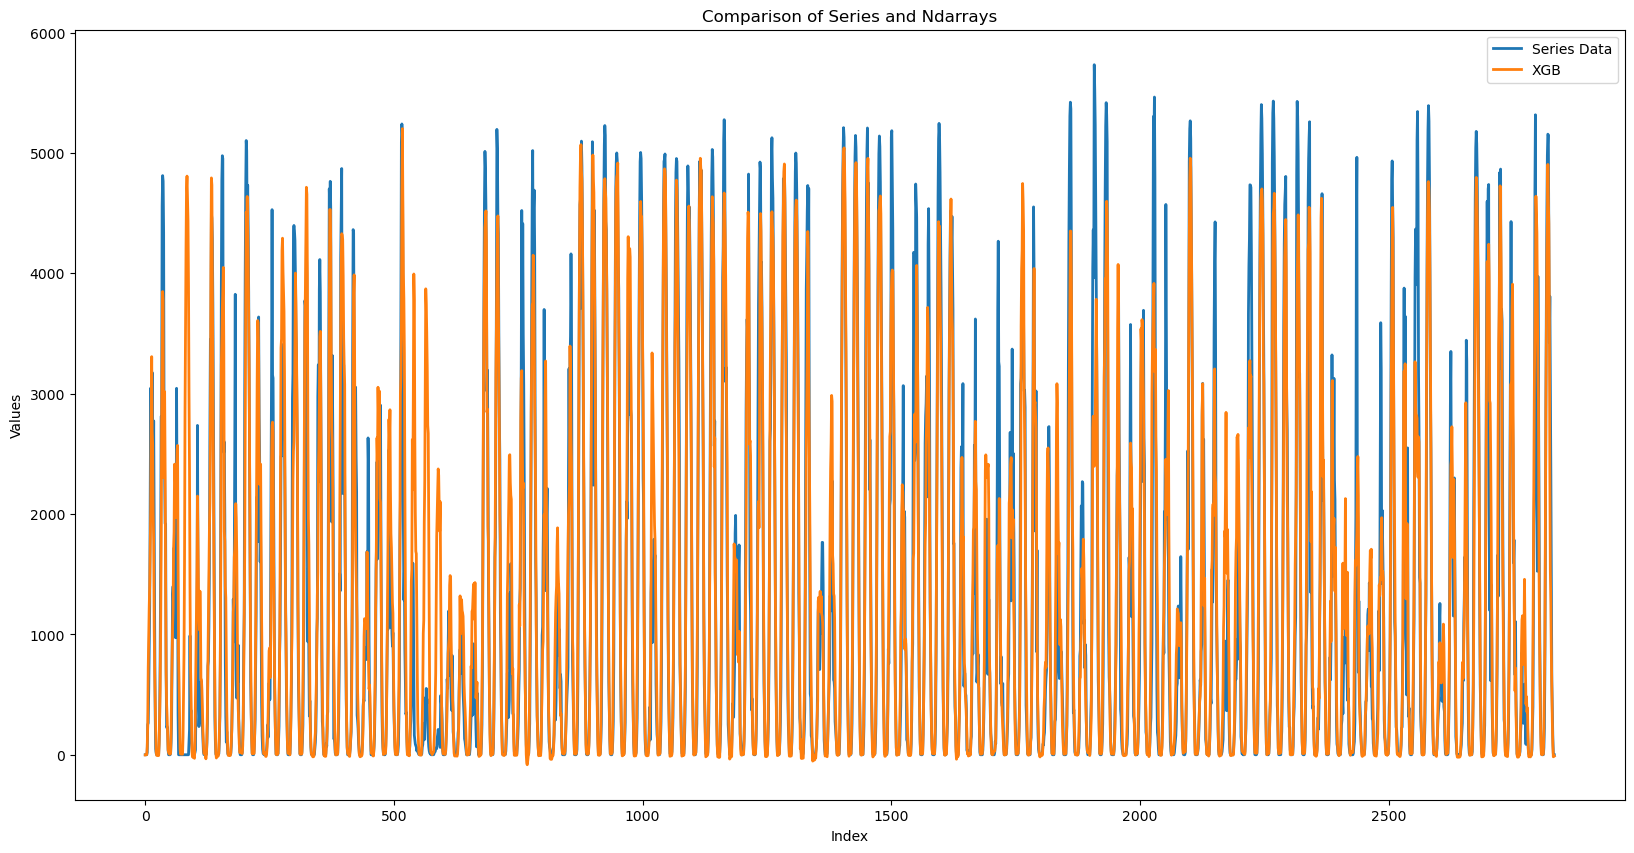

In [266]:
selected_features_a = selected_features.copy()
#selected_features_a.remove("direct_rad:W")
hyperparameters_a = hyperparameters
wanted_months_a = [3,4,5,7,8,9,10]
wanted_months_est = [3,4,5,6,7,8,9,10]
X_train_a_prep = prepare_X(X_observed_a.copy(), X_estimated_a.copy(), selected_features_a, wanted_months_a, wanted_months_est)
X_train_a, y_train_a = resize_training_data(X_train_a_prep, y_a)
X_test_a_prep = prepare_testdata_rf_a(X_test_a, selected_features_a)
X_train_june = subset_months(X_observed_a, [6])
X_train_june = mean_df(clean_df(X_train_june, selected_features_a))
X_april = X_train_a[-24*30:]
X_train_a_reduced = X_train_a[:-24*30]
y_train_a_reduced = y_train_a[:-24*30]
y_validd = y_train_a[-24*30:]

X_concat = pd.concat([X_train_june,X_april],axis = 0)

X_validd, y_valid = resize_training_data(X_train_june, y_a)
X_valid = X_validd.drop(columns = ["date_forecast"])
X_train_a_reduced = X_train_a_reduced.drop(columns = ["date_forecast"])
X_april = X_april.drop(columns = ["date_forecast"])

xgb_base = XGB_model(hyperparameters_a, X_train_a_reduced, X_test_a_prep, y_train_a_reduced)
xgb_base.fit()
xgb_base.pred()
xgb_base.pred_valid(X_valid)
mae = mean_absolute_error(y_valid["pv_measurement"], xgb_base.pred_valid)
print(mae)
import matplotlib.pyplot as plt

# Again, assuming you have the following:
# series_data - This is your pandas Series
# ndarray1 - Your first NumPy array
# ndarray2 - Your second NumPy array
# Now plot all three with matplotlib
plt.figure(figsize=(20,10))
day = 24*23
plt.plot(y_valid.index, y_valid["pv_measurement"], label='Series Data', linewidth=2)
plt.plot(y_valid.index, xgb_base.pred_valid, label='XGB', linewidth=2)  # Assumes same index as series_data

plt.legend()
plt.title('Comparison of Series and Ndarrays')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()
#xgb_base.feature_importence_plot()

66.47664815374442


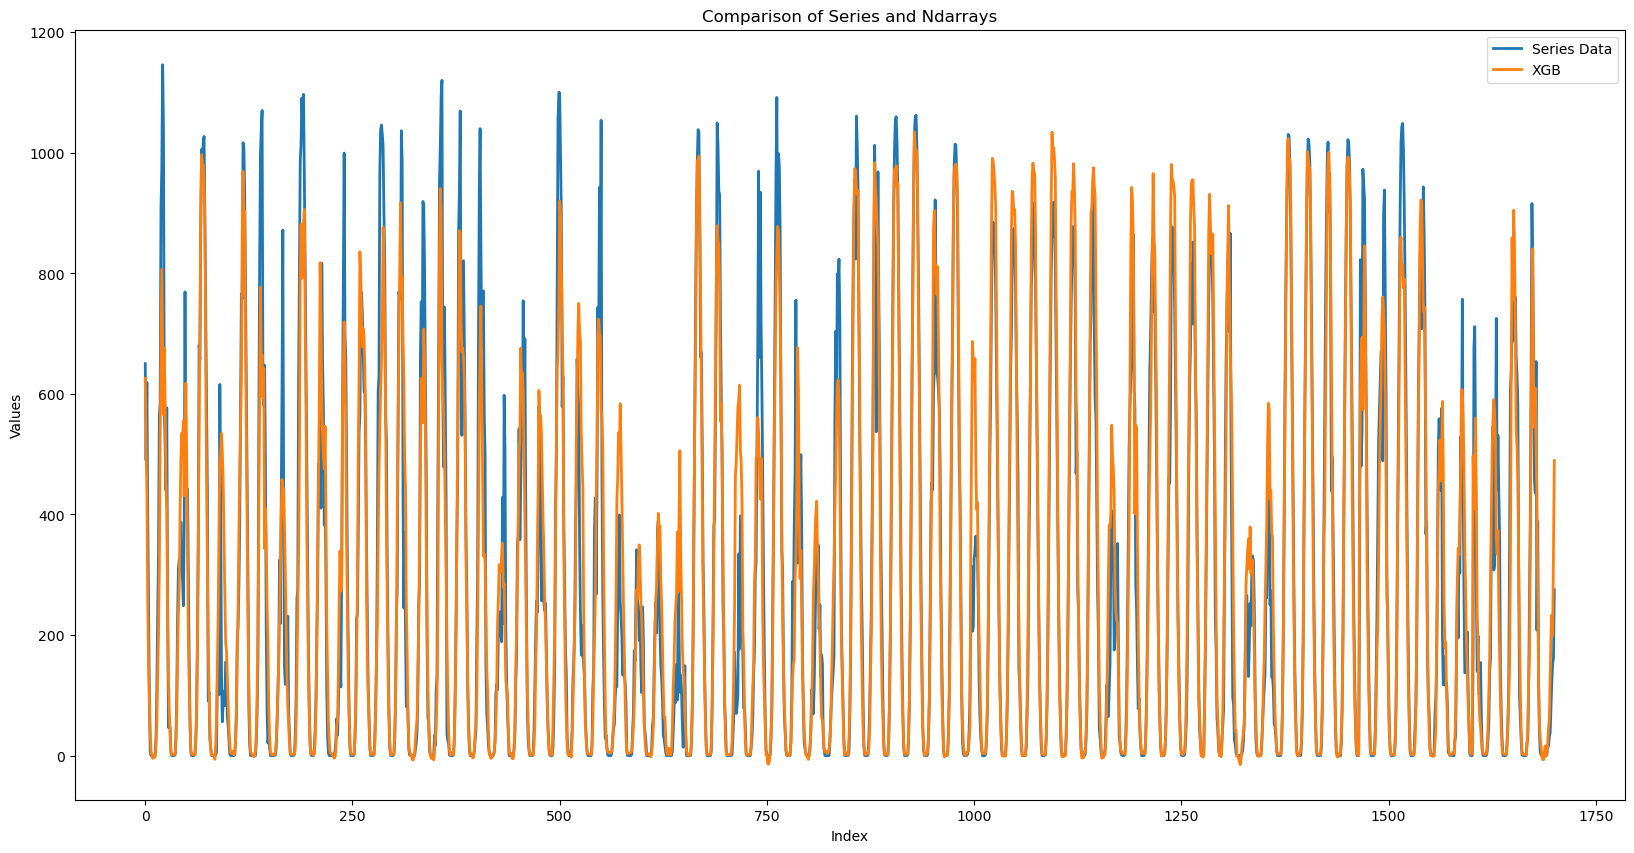

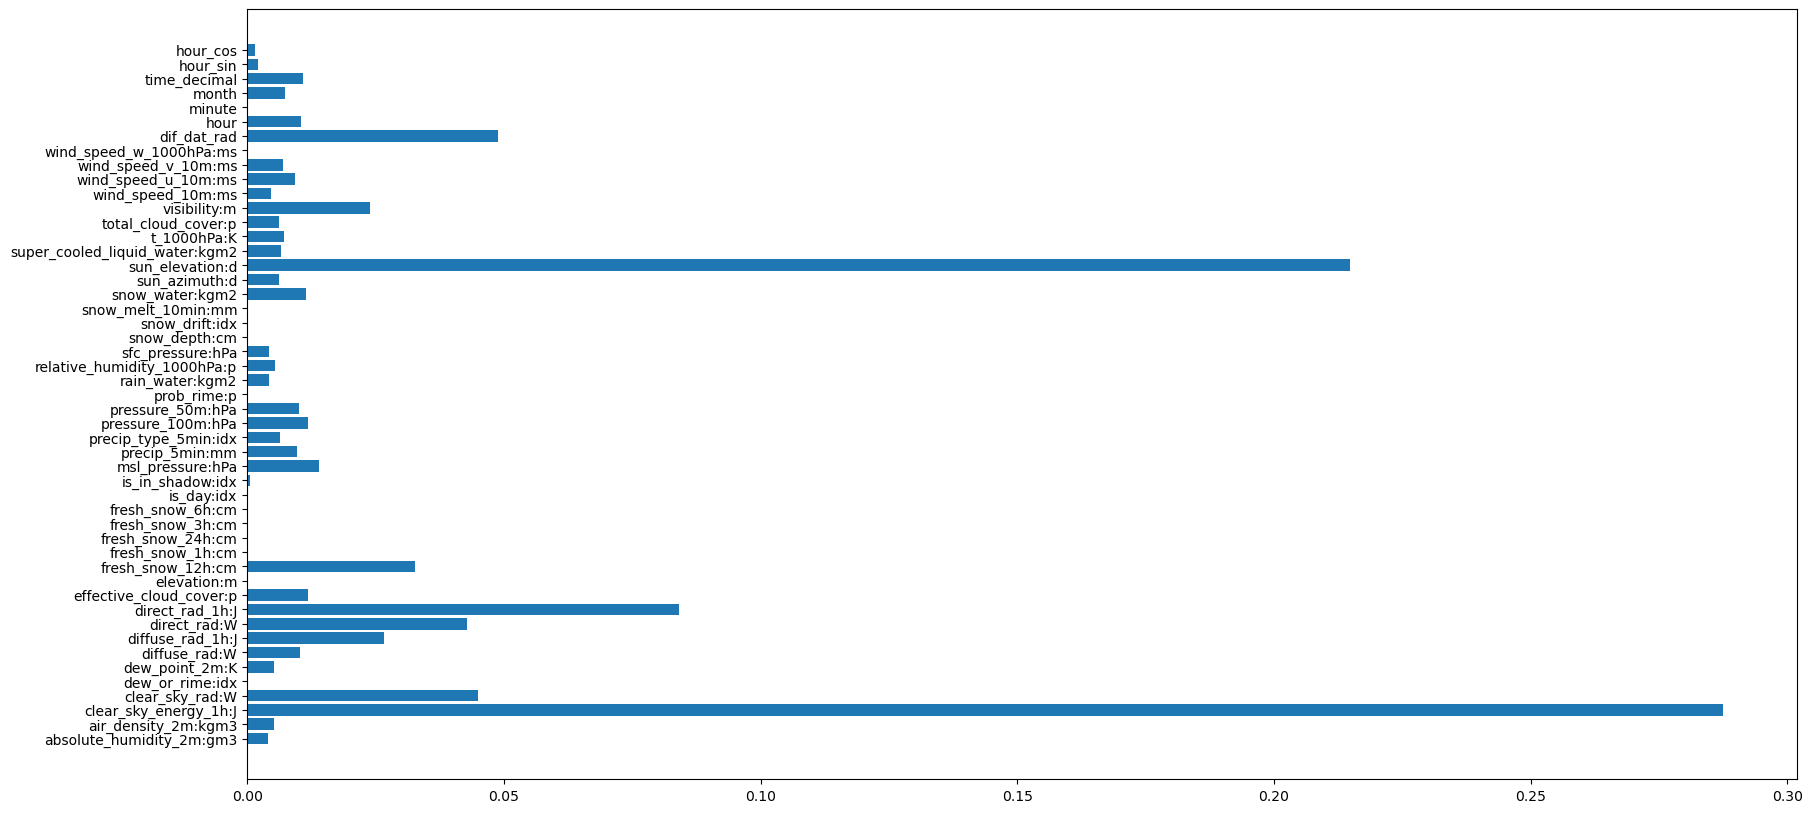

In [275]:
selected_features_b = selected_features.copy()
#selected_features_b.remove("direct_rad:W")
hyperparameters_b = hyperparameters
wanted_months_b = [4,5,7,8,9]
wanted_months_est = [3,4,5,6,7,8,9,10]
X_train_b_prep = prepare_X(X_observed_b.copy(), X_estimated_b.copy(), selected_features_b, wanted_months_b, wanted_months_est)
X_train_b, y_train_b = resize_training_data(X_train_b_prep, y_b)
X_test_b_prep = prepare_testdata_rf_a(X_test_b, selected_features_b)
X_train_june = subset_months(X_observed_b, [6])
X_train_june = mean_df(clean_df(X_train_june, selected_features_b))
X_bpril = X_train_b[-24*30:]
X_train_b_reduced = X_train_b[:-24*30]
y_train_b_reduced = y_train_b[:-24*30]
y_validd = y_train_b[-24*30:]

X_concat = pd.concat([X_train_june,X_bpril],axis = 0)

X_validd, y_valid = resize_training_data(X_train_june, y_b)
X_valid = X_validd.drop(columns = ["date_forecast"])
X_train_b_reduced = X_train_b_reduced.drop(columns = ["date_forecast"])
X_bpril = X_bpril.drop(columns = ["date_forecast"])

xgb_base = XGB_model(hyperparameters_b, X_train_b_reduced, X_test_b_prep, y_train_b_reduced)
xgb_base.fit()
xgb_base.pred()
xgb_base.pred_valid(X_valid)
mae = mean_absolute_error(y_valid["pv_measurement"], xgb_base.pred_valid)
print(mae)
import matplotlib.pyplot as plt

# Again, assuming you have the following:
# series_data - This is your pandas Series
# ndarray1 - Your first NumPy array
# ndarray2 - Your second NumPy array
# Now plot all three with matplotlib
plt.figure(figsize=(20,10))
day = 24*23
plt.plot(y_valid.index, y_valid["pv_measurement"], label='Series Data', linewidth=2)
plt.plot(y_valid.index, xgb_base.pred_valid, label='XGB', linewidth=2)  # Assumes same index as series_data

plt.legend()
plt.title('Comparison of Series and Ndarrays')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()
xgb_base.feature_importence_plot()

In [ ]:
xgb_a = XGB_model(hyperparameters_a, X_train_a, X_test_a_prep, y_train_a)

In [ ]:
xgb_a_cross_val_predictions,xgb_a_cross_val_actuals, xgb_a_cross_val_mae_mean = xgb_a.cross_val_stack(X_train_a, y_train_a)

In [ ]:
xgb_a.cross_validate(X_train_a, y_train_a)

In [ ]:
xgb_a.fit()
xgb_a.pred()
xgb_a_test_pred = xgb_a.prediction
xgb_a.feature_importence_plot()

# Dataset B

In [ ]:
selected_features_b = selected_features
hyperparameters_b = hyperparameters
wanted_months_b = wanted_months

In [ ]:
X_train_b_prep = prepare_X(X_observed_b, X_estimated_b, selected_features_b, wanted_months_b)
X_train_b, y_train_b = resize_training_data(X_train_b_prep, y_b)
X_test_b_prep = prepare_testdata_rf_a(X_test_b, selected_features_b)

In [ ]:
xgb_b = XGB_model(hyperparameters_b, X_train_b, X_test_b_prep, y_train_b)

In [ ]:
xgb_b_cross_val_predictions,xgb_b_cross_val_actuals, xgb_b_cross_val_mae_mean = xgb_b.cross_val_stack(X_train_b, y_train_b)

In [ ]:
#xgb_b.cross_validate(X_train_b, y_train_b)

In [ ]:
xgb_b.fit()
xgb_b.pred()
xgb_b_test_pred = xgb_b.prediction
xgb_b.feature_importence_plot()

# Dataset C

In [83]:
selected_features_c = selected_features
hyperparameters_c = hyperparameters
wanted_months_c = wanted_months

In [85]:
X_train_c_prep = prepare_X(X_observed_c, X_estimated_c, selected_features_c, wanted_months_c, wanted_months_est)
X_train_c, y_train_c = resize_training_data(X_train_c_prep, y_c)
X_test_c_prep = prepare_testdata_rf_a(X_test_c, selected_features_c)

AttributeError: 'tuple' object has no attribute 'columns'

In [ ]:
xgb_c = XGB_model(hyperparameters_c, X_train_c, X_test_c_prep, y_train_c)

In [ ]:
xgb_c_cross_val_predictions,xgb_c_cross_val_actuals, xgb_c_cross_val_mae_mean = xgb_c.cross_val_stack(X_train_c, y_train_c)

In [ ]:
#xgb_c.cross_validate(X_train_c, y_train_c)

In [ ]:
xgb_c.fit()
xgb_c.pred()
xgb_c_test_pred = xgb_c.prediction
xgb_c.feature_importence_plot()